In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
lock_df = pd.read_csv("lock-results.csv", header = None)
nolock_df = pd.read_csv("nolock-results.csv", header = None)

lock_df.columns = ["n", "threads", "time_ms"]
nolock_df.columns = ["n", "threads", "time_ms"]

lock_df.to_csv("lock-results-with_headers.csv", index=False)
nolock_df.to_csv("nolock-results-with_headers.csv", index=False)

In [4]:
new_lock_df = pd.read_csv("lock-results-with_headers.csv")
new_nolock_df = pd.read_csv("nolock-results-with_headers.csv")

In [ ]:
lock_grouped = new_lock_df.groupby("threads")["time_ms"]
lock_avg = lock_grouped.mean()
lock_std = lock_grouped.std()

nolock_grouped = new_nolock_df.groupby("threads")["time_ms"]
nolock_avg = nolock_grouped.mean()
nolock_std = nolock_grouped.std()

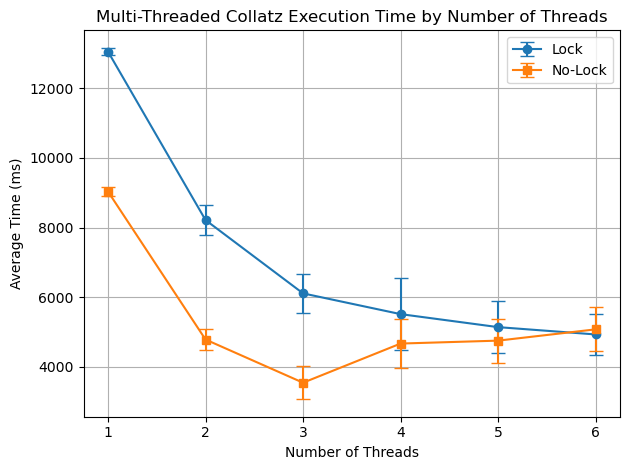

In [11]:
# Plot lock results
plt.errorbar(
    lock_avg.index, lock_avg.values, yerr=lock_std.values,
    label="Lock", fmt='-o', capsize=5
)

# Plot no-lock results
plt.errorbar(
    nolock_avg.index, nolock_avg.values, yerr=nolock_std.values,
    label="No-Lock", fmt='-s', capsize=5
)

# Customize plot
plt.title("Multi-Threaded Collatz Execution Time by Number of Threads")
plt.xlabel("Number of Threads")
plt.ylabel("Average Time (ms)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("MTCollatz_plot.png")
plt.show()